# Pierce's Workspace

Use data science skills to investigate and answer a research question of interest

__Suggested approach__

Articulate a specific data science question

Identify, collect, manage, and wrangle data

Perform exploratory data analysis to identify trends and patterns

Measure the strength and magnitude of relationships (statistical approach)

Attempt to predict your outcome of interest (machine learning approach)


In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import Ridge
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf
from sklearn import metrics

# Load OLD prepped data

In [6]:
play_features = pd.read_csv('data/prepped/features_final.csv')
play_reviews = pd.read_csv('data/prepped/reviews_final.csv')

In [8]:
play_features.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [9]:
play_reviews.head(2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462


## Predicting Category based on Title!

In [25]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(play_features.App)
X_train_counts.shape

(9360, 7604)

In [26]:
print(count_vect.vocabulary_.get(u'algorithm'))

None


In [28]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(9360, 7604)

In [29]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(9360, 7604)

In [32]:
clf = MultinomialNB().fit(X_train_tfidf, play_features.Category)

In [34]:
accuracy_score(clf.predict(X_train_counts), play_features.Category)

0.6476495726495727

## More Compact Assessment of Relationship between title and category

In [45]:
x1, x2, y1, y2 = train_test_split(play_features.App, play_features.Category, train_size=0.9, test_size=0.1)

tc_pipeline_1 = make_pipeline(CountVectorizer(), TfidfTransformer(), MultinomialNB())

tc_pipeline_1.fit(x1, y1)

accuracy_score(tc_pipeline_1.predict(x2), y2)

0.46153846153846156

# Load NEW Prepped Data

In [2]:
play_features = pd.read_csv('data/prepped/play_features.csv')
play_outcomes = pd.read_csv('data/prepped/play_outcomes.csv')

## Linear Modeling, Yo

In [3]:
play_features_installs = play_features.copy()
play_features_installs['installs'] = play_outcomes['installs']
play_features_installs.columns

Index(['app', 'category', 'size', 'type', 'price', 'content_rating', 'genres',
       'last_updated', 'current_ver', 'android_min_ver', 'installs'],
      dtype='object')

In [28]:
play_features_installs['installs'] = [s.replace("+", "") for s in play_features_installs['installs']]
play_features_installs['installs'] = [s.replace(",", "") for s in play_features_installs['installs']]
play_features_installs['installs'] = [float(s) for s in play_features_installs['installs']]

play_features_installs.head(1)

AttributeError: 'int' object has no attribute 'replace'

In [29]:
play_features_installs.head()

,app,category,size,type,price,content_rating,genres,last_updated,current_ver,android_min_ver,installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,19M,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4_0_3,10000
1,Coloring book moana,ART_AND_DESIGN,14M,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4_0_3,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,8.7M,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4_0_3,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,25M,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4_2,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,2.8M,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4_4,100000


In [30]:
temp_data = play_features_installs

installs_model_1 = smf.ols(formula='installs ~ type + category + content_rating + genres + price - 1', data=temp_data).fit()

temp_data.head()
installs_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               installs   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     3.459
Date:                Sun, 10 Mar 2019   Prob (F-statistic):           5.73e-52
Time:                        16:39:54   Log-Likelihood:            -1.8451e+05
No. Observations:                9360   AIC:                         3.694e+05
Df Residuals:                    9162   BIC:                         3.708e+05
Df Model:                         197                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
type[Free]                                      -4.918e+18    2.4e+20     -0.020      0.984   -4.76e+20    4.66e+20
type[Paid]                                      -5.402e+07   8.41e+07     -0.642      0.521   -2.19e+08    1.11e+08
category[T.AUTO_AND_VEHICLES]                   -1.973e+18   3.56e+19     -0.055      0.956   -7.17e+19    6.78e+19
category[T.BEAUTY]                               3.171e+18   5.72e+19      0.055      0.956   -1.09e+20    1.15e+20
category[T.BOOKS_AND_REFERENCE]                  -1.94e+18    3.5e+19     -0.055      0.956   -7.05e+19    6.66e+19
category[T.BUSINESS]                              -3.2e+18   5.77e+19     -0.055      0.956   -1.16e+20     1.1e+20
category[T.COMICS]                              -2.202e+18   3.97e+19     -0.055      0.956      -8e+19    7.56e+19
category[T.COMMUNICATION]                        4.155e+18   7.49e+19      0.055      0.956   -1.43e+20    1.51e+20
category[T.DATING]                               1.828e+19    3.3e+20      0.055      0.956   -6.28e+20    6.64e+20
category[T.EDUCATION]                             3.02e+06   6.67e+07      0.045      0.964   -1.28e+08    1.34e+08
category[T.ENTERTAINMENT]                        5.407e+06   6.52e+07      0.083      0.934   -1.22e+08    1.33e+08
category[T.EVENTS]                               7.129e+17   1.29e+19      0.055      0.956   -2.45e+19    2.59e+19
category[T.FAMILY]                               5.913e+04   6.49e+07      0.001      0.999   -1.27e+08    1.27e+08
category[T.FINANCE]                             -2.278e+18   4.11e+19     -0.055      0.956   -8.28e+19    7.82e+19
category[T.FOOD_AND_DRINK]                      -2.759e+18   4.97e+19     -0.055      0.956      -1e+20    9.47e+19
category[T.GAME]                                 5.538e+07   6.55e+07      0.846      0.398    -7.3e+07    1.84e+08
category[T.HEALTH_AND_FITNESS]                    9.73e+16   1.75e+18      0.055      0.956   -3.34e+18    3.54e+18
category[T.HOUSE_AND_HOME]                       4.812e+16   8.68e+17      0.055      0.956   -1.65e+18    1.75e+18
category[T.LIBRARIES_AND_DEMO]                  -7.168e+16   1.29e+18     -0.055      0.956    -2.6e+18    2.46e+18
category[T.LIFESTYLE]                            5.316e+16   9.58e+17      0.055      0.956   -1.83e+18    1.93e+18
category[T.MAPS_AND_NAVIGATION]                 -5.795e+16   1.04e+18     -0.055      0.956   -2.11e+18    1.99e+18
category[T.MEDICAL]                             -1.193e+17   2.15e+18     -0.055      0.956   -4.33e+18     4.1e+18
category[T.NEWS_AND_MAGAZINES]                  -1.312e+17   2.36e+18     -0.055      0.956   -4.77e+18     4.5e+18
category[T.PARENTING]                             2.49e+16   4.49e+

# More Linear Modeling, yo

In [38]:
play_features = pd.read_csv('data/prepped/play_features.csv')
play_outcomes = pd.read_csv('data/prepped/play_outcomes.csv')

play_features['installs'] = play_outcomes['installs']

play_features.head(1)

,app,category,size,type,price,content_rating,genres,last_updated,current_ver,android_min_ver,days_since_update,installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,19000000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4_0_3,427.0,"10,000+"


In [39]:
play_features['installs'] = [s.replace("+", "") for s in play_features['installs']]
play_features['installs'] = [s.replace(",", "") for s in play_features['installs']]
play_features['installs'] = [float(s) for s in play_features['installs']]

play_features.installs.unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 1.e+02, 5.e+02, 1.e+01,
       5.e+00, 5.e+01, 1.e+00])

In [47]:

installs_model_2 = smf.ols(formula='installs ~ type + days_since_update + price + size - 1', data=play_features).fit()

installs_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               installs   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     29.21
Date:                Sun, 10 Mar 2019   Prob (F-statistic):           3.56e-24
Time:                        20:50:23   Log-Likelihood:            -1.8478e+05
No. Observations:                9360   AIC:                         3.696e+05
Df Residuals:                    9355   BIC:                         3.696e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
type[Free]         2.674e+07   2.34e+06     11.408      0.000    2.21e+07    3.13e+07
type[Paid]         1.426e+07   4.47e+06      3.189      0.001    5.49e+06     2.3e+07
days_since_update -2.205e+04   2440.803     -9.035      0.000   -2.68e+04   -1.73e+04
price             -2.079e+04   6.09e+04     -0.342      0.733    -1.4e+05    9.85e+04
size                  0.0581      0.042      1.397      0.163      -0.023       0.140
==============================================================================
Omnibus:                    13441.745   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2998165.469
Skew:                           8.847   Prob(JB):                         0.00
Kurtosis:                      88.875   Cond. No.                     2.28e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Logistic regression, bruh

In [49]:
play_features = pd.read_csv('data/prepped/play_features.csv')
play_outcomes = pd.read_csv('data/prepped/play_outcomes.csv')

play_features.head(1)

,app,category,size,type,price,content_rating,genres,last_updated,current_ver,android_min_ver,days_since_update
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,19000000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4_0_3,427.0


In [65]:
#play_features_selected = play_features[['category', 'size', 'type', 'price', 'content_rating', 'genres', 'last_updated', 'current_ver', 'android_min_ver', 'days_since_update']]
play_features_selected = play_features[['category', 'size', 'type', 'price', 'content_rating', 'genres', 'days_since_update']]


play_features_selected = pd.get_dummies(play_features_selected)

x1, x2, y1, y2 = train_test_split(play_features_selected, play_outcomes.installs, train_size=0.9, test_size=0.1)

lr_pipeline_1 = make_pipeline(LogisticRegression(solver='lbfgs', multi_class='multinomial'))

lr_pipeline_1.fit(x1, y1)

accuracy_score(lr_pipeline_1.predict(x2), y2)

0.16452991452991453

# Predicting installs with app title

In [102]:
play_features = pd.read_csv('data/prepped/play_features.csv')
play_outcomes = pd.read_csv('data/prepped/play_outcomes.csv')

play_features.head(1)

,app,category,size,type,price,content_rating,genres,last_updated,current_ver,android_min_ver,days_since_update
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,19000000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4_0_3,427.0


In [113]:
x1, x2, y1, y2 = train_test_split(play_features.app, play_outcomes.installs, train_size=0.9, test_size=0.1)

text_pipeline_1 = make_pipeline(CountVectorizer(), TfidfTransformer(), MultinomialNB())

text_pipeline_1.fit(x1, y1)

#print(text_pipeline_1)

accuracy_score(text_pipeline_1.predict(x2), y2)

0.2745726495726496

27.5% accuracy! Ain't nothing to this pipefittin'

# Ok that sucks, lets try using NLTK!

In [119]:
play_features = pd.read_csv('data/prepped/play_features.csv')
play_outcomes = pd.read_csv('data/prepped/play_outcomes.csv')

play_features.head(1)

,app,category,size,type,price,content_rating,genres,last_updated,current_ver,android_min_ver,days_since_update
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,19000000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4_0_3,427.0


34035


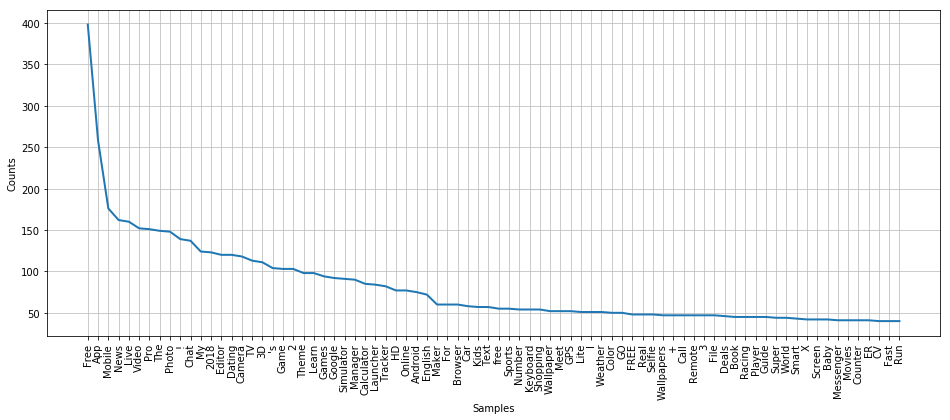

<bound method Counter.elements of FreqDist({'Free': 398, 'App': 258, 'Mobile': 176, 'News': 162, 'Live': 160, 'Video': 152, 'Pro': 151, 'The': 149, 'Photo': 148, '!': 139, ...})>

In [168]:
stop_words=list(stopwords.words("english"))

stop_words.extend(['/', ':', '.', '&', '(', ')', '-', ",", '-', '–'])

words_list = []

for title in play_features.app:
    for word in word_tokenize(title):
        if word not in stop_words:
            words_list.append(word)
    
print(len(words_list))

from nltk.probability import FreqDist

fdist = FreqDist(words_list)

plt.figure(figsize=(16,6))

fdist.plot(80,cumulative=False)

fdist.elements

## Use NLTK more!

In [156]:
play_features = pd.read_csv('data/prepped/play_features.csv')
play_outcomes = pd.read_csv('data/prepped/play_outcomes.csv')

play_features.head(1)

,app,category,size,type,price,content_rating,genres,last_updated,current_ver,android_min_ver,days_since_update
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,19000000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4_0_3,427.0


In [164]:
stop_words=list(stopwords.words("english"))

stop_words.extend(['/', ':', '.', '&', '(', ')', '-', ",", '-', '–'])

x1, x2, y1, y2 = train_test_split(play_features.app, play_outcomes.installs, train_size=0.9, test_size=0.1)

text_pipeline_2 = make_pipeline(CountVectorizer(lowercase=True, stop_words=stop_words, ngram_range=(1,1)), TfidfTransformer(), MultinomialNB())

text_pipeline_2.fit(x1, y1)

accuracy_score(text_pipeline_2.predict(x2), y2)

0.25854700854700857

# MAYBE ANALYZE TEXT SENTIMENT??? AND COMPARE TO INSTALLS???

In [2]:
play_features = pd.read_csv('data/prepped/play_features.csv')
play_outcomes = pd.read_csv('data/prepped/play_outcomes.csv')

play_features.head(1)

,app,category,size,type,price,content_rating,genres,last_updated,current_ver,android_min_ver,days_since_update
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,19000000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4_0_3,427.0


In [10]:
stop_words=list(stopwords.words("english"))

stop_words.extend(['/', ':', '.', '&', '(', ')', '-', ",", '-', '–'])

x1, x2, y1, y2 = train_test_split(play_features.app, play_outcomes.installs, train_size=0.9, test_size=0.1)

text_pipeline_2 = make_pipeline(CountVectorizer(lowercase=True, stop_words=stop_words, ngram_range=(1,1)), TfidfTransformer(), MultinomialNB())

text_pipeline_2.fit(x1, y1)

accuracy_score(text_pipeline_2.predict(x2), y2)

0.28739316239316237

## Linear Modeling with Title

In [36]:
play_features = pd.read_csv('data/prepped/play_features.csv')
play_outcomes = pd.read_csv('data/prepped/play_outcomes.csv')

play_features['installs'] = play_outcomes['installs']

play_features['installs'] = [s.replace("+", "") for s in play_features['installs']]
play_features['installs'] = [s.replace(",", "") for s in play_features['installs']]
play_features['installs'] = [float(s) for s in play_features['installs']]
print(play_features.installs.dtypes)
play_features.head(1)

float64


,app,category,size,type,price,content_rating,genres,last_updated,current_ver,android_min_ver,days_since_update,installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,19000000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4_0_3,427.0,10000.0


In [74]:
from nltk.corpus import stopwords

stop_words=list(stopwords.words("english"))
stop_words.extend(['/', ':', '.', '&', '(', ')', '-', ",", '-', '–'])

play_titles = play_features.app

countVectorizer = CountVectorizer(lowercase=True, stop_words=stop_words, ngram_range=(1,1))
countVectorizer.fit(play_titles)
countVectorizer.transform(play_titles)

#TfidfTransformer()

from nltk.corpus import wordnet

words_list = []

for title in play_features.app:
    for word in word_tokenize(title):
        word = word.lower()
        if word not in stop_words:
            if word not in words_list: 
                if wordnet.synsets(word):
                    words_list.append(word)

from nltk.probability import FreqDist

fdist = FreqDist(words_list)

#plt.figure(figsize=(16,6))

#fdist.plot(80,cumulative=False

from sklearn import linear_model

stop_words=list(stopwords.words("english"))

stop_words.extend(['/', ':', '.', '&', '(', ')', '-', ",", '-', '–'])

x1, x2, y1, y2 = train_test_split(play_features.app, play_features.installs, train_size=0.9, test_size=0.1)

text_pipeline_3 = make_pipeline(CountVectorizer(lowercase=True, stop_words=stop_words, ngram_range=(1,1)), TfidfTransformer(), LinearRegression())

text_pipeline_3.fit(play_features.app, play_features.installs)

#accuracy_score(text_pipeline_3.predict(x2), y2)

words_results = pd.DataFrame()
words_results['word'] = words_list

words_results['pred_installs'] = text_pipeline_3.predict(words_list)

word_results = words_results.sort_values('pred_installs', ascending=False)

word_results.index = range(1, word_results.shape[0] + 1)

print(word_results.loc[word_results['word'] == 'church'])
print(word_results.shape[0] + 1)

       word  pred_installs
702  church   5.099793e+07
4271


In [75]:
from nltk.corpus import stopwords

stop_words=list(stopwords.words("english"))
stop_words.extend(['/', ':', '.', '&', '(', ')', '-', ",", '-', '–'])

play_titles = play_features.app

countVectorizer = CountVectorizer(lowercase=True, stop_words=stop_words, ngram_range=(1,1))
countVectorizer.fit(play_titles)
countVectorizer.transform(play_titles)

#TfidfTransformer()

from nltk.corpus import wordnet

words_list = []

for title in play_features.app:
    for word in word_tokenize(title):
        word = word.lower()
        if word not in stop_words:
            if word not in words_list: 
                if wordnet.synsets(word):
                    words_list.append(word)

from nltk.probability import FreqDist

fdist = FreqDist(words_list)

#plt.figure(figsize=(16,6))

#fdist.plot(80,cumulative=False

from sklearn import linear_model

stop_words=list(stopwords.words("english"))

stop_words.extend(['/', ':', '.', '&', '(', ')', '-', ",", '-', '–'])

x1, x2, y1, y2 = train_test_split(play_features.app, play_features.installs, train_size=0.9, test_size=0.1)

text_pipeline_3 = make_pipeline(CountVectorizer(lowercase=True, stop_words=stop_words, ngram_range=(1,1)), TfidfTransformer(), MultinomialNB())

text_pipeline_3.fit(x1, y1)

#accuracy_score(text_pipeline_3.predict(x2), y2)

words_results = pd.DataFrame()
words_results['word'] = words_list

words_results['pred_installs'] = text_pipeline_3.predict(words_list)

words_results.sort_values('pred_installs', ascending=False).head()

,word,pred_installs
1383,tsunami,100000000.0
1911,wish,100000000.0
1409,tom,100000000.0
2071,attractions,100000000.0
484,opera,100000000.0


In [ ]:
#installs_model_2 = smf.ols(formula='installs ~ app - 1', data=play_titles).fit()

#installs_model_2.summary()

# NEURAL NETWORKS???

## Exploration

BEAUTY                   42
EVENTS                   45
PARENTING                50
COMICS                   58
ART AND DESIGN           61
LIBRARIES AND DEMO       64
AUTO AND VEHICLES        73
WEATHER                  75
HOUSE AND HOME           76
FOOD AND DRINK          109
MAPS AND NAVIGATION     124
ENTERTAINMENT           149
EDUCATION               155
VIDEO PLAYERS           160
BOOKS AND REFERENCE     178
DATING                  195
TRAVEL AND LOCAL        226
NEWS AND MAGAZINES      233
SHOPPING                238
SOCIAL                  259
HEALTH AND FITNESS      297
BUSINESS                303
PERSONALIZATION         312
LIFESTYLE               314
PHOTOGRAPHY             317
SPORTS                  319
FINANCE                 323
COMMUNICATION           328
MEDICAL                 350
PRODUCTIVITY            351
TOOLS                   733
GAME                   1097
FAMILY                 1746
Name: app, dtype: int64
BEAUTY                   42
EVENTS                  

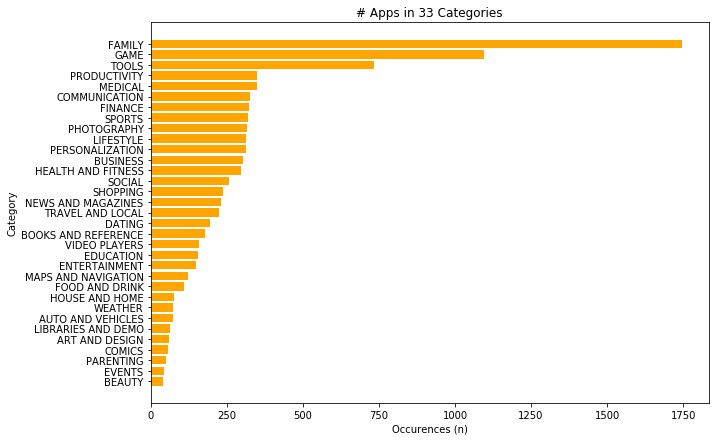

In [91]:
plt.figure(figsize=(10,7))
#plt.xticks(rotation=90)

category_counts = play_features.groupby('category').count()['app'].sort_values()
category_counts.index = [s.replace("_", " ") for s in category_counts.index]

print(category_counts)

plt.barh(category_counts.index, category_counts, color="orange")

plt.title("# Apps in 33 Categories")
plt.xlabel("Occurences (n)")
plt.ylabel("Category")

print(category_counts)
print("categories:", category_counts.shape[0])

In [76]:
play_features = pd.read_csv('data/prepped/play_features.csv')
play_outcomes = pd.read_csv('data/prepped/play_outcomes.csv')

play_features['installs'] = play_outcomes['installs']

play_features['installs'] = [s.replace("+", "") for s in play_features['installs']]
play_features['installs'] = [s.replace(",", "") for s in play_features['installs']]
play_features['installs'] = [float(s) for s in play_features['installs']]

play_features.head(10)


,app,category,size,type,price,content_rating,genres,last_updated,current_ver,android_min_ver,days_since_update,installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,19000000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4_0_3,427.0,10000.0
1,Coloring book moana,ART_AND_DESIGN,14000000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4_0_3,419.0,500000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4_0_3,221.0,5000000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,25000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4_2,275.0,50000000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,28000000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4_4,263.0,100000.0
5,Paper flowers instructions,ART_AND_DESIGN,56000000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2_3,714.0,50000.0
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,19000000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4_0_3,318.0,50000.0
7,Infinite Painter,ART_AND_DESIGN,29000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4_2,269.0,1000000.0
8,Garden Coloring Book,ART_AND_DESIGN,33000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3_0,536.0,1000000.0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,31000000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4_0_3,250.0,10000.0


In [77]:
play_outcomes.head(10)

,rating,reviews,installs
0,4.1,159,"10,000+"
1,3.9,967,"500,000+"
2,4.7,87510,"5,000,000+"
3,4.5,215644,"50,000,000+"
4,4.3,967,"100,000+"
5,4.4,167,"50,000+"
6,3.8,178,"50,000+"
7,4.1,36815,"1,000,000+"
8,4.4,13791,"1,000,000+"
9,4.7,121,"10,000+"


In [78]:
play_features['rating'] = play_outcomes['rating']
play_features['reviews'] = play_outcomes['reviews']

In [80]:
play_features.describe()

,size,price,days_since_update,installs,rating,reviews
count,9.360000e+03,9360.000000,9360.000000,9.360000e+03,9360.000000,9.360000e+03
mean,3.978181e+07,0.961279,465.457692,1.790875e+07,4.191838,5.143767e+05
std,2.287960e+07,15.821640,396.167305,9.126637e+07,0.515263,3.145023e+06
min,1.400000e+04,0.000000,214.000000,1.000000e+00,1.000000,1.000000e+00
25%,2.200000e+07,0.000000,229.000000,1.000000e+04,4.000000,1.867500e+02
50%,3.978181e+07,0.000000,282.000000,5.000000e+05,4.300000,5.955000e+03
75%,5.000000e+07,0.000000,517.000000,5.000000e+06,4.500000,8.162750e+04
max,1.000000e+08,400.000000,3215.000000,1.000000e+09,5.000000,7.815831e+07
